In [1]:
#import libaries
import numpy as np   #mathematics
import pandas as pd  #data

import seaborn as sns #graphics
import os #manage files
import matplotlib.pyplot as plt  #plots
from matplotlib import rc

import sklearn 
from sklearn.model_selection import train_test_split as tts
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from scipy import stats as st
import itertools
import tabulate   #need to install the package first. Go to Anaconda Prompt and type: conda install tabulate
os.chdir('C:\\Users\\A4 Dell\\Desktop\\Northwestern University\\Practical Machine Learning\\week2')

RANDOM_SEED = 1 # seed value for random number generator           

In [2]:
############################ Read Data and Examine #####################
bank1 = pd.read_csv('bank.csv', sep = ';') 
bank1 = bank1.dropna()
print(bank1.shape)
print(list(bank1.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response']


In [3]:
############################ Generate Dummy Variables #####################
bank=pd.get_dummies(bank1) #Convert categorical values to dummy variables for use in modeling
            #One categorical variable is transformed to N dummy variables (N is # of levels)
    
print(pd.DataFrame.head(bank1)) #Header of the original data 
print(pd.DataFrame.head(bank)) #Header of the transfored data with more dummy variables

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome response  
0  cellular   19   oct        79         1     -1         0  unknown       no  
1  cellular   11   may       220         1    339         4  failure       no  
2  cellular   16   apr       185         1    330         1  failure       no  
3   unknown    3   jun       199         4     -1         0  unknown       no  
4   unknown    5   may       226         1     -1         0  unknown       no  
   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30  

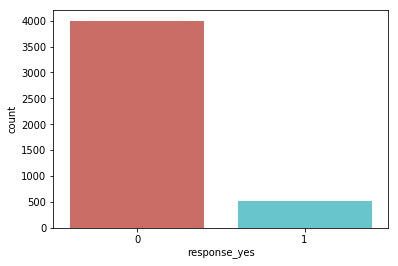

Housing      0     1
Response            
0         1661  2339
1          301   220 

Loan         0    1
Response           
0         3352  648
1          478   43 

Default      0   1
Response          
0         3933  67
1          512   9 



In [4]:
####################### Crosstabs and Plot ###########################
bank['response_yes'].value_counts()
sns.countplot(x='response_yes',data=bank, palette='hls')
plt.show()  #barplot of responses

a=pd.crosstab(bank.response_yes, bank.housing_yes, 
            rownames=['Response'], colnames=['Housing'])

b=pd.crosstab(bank.response_yes, bank.loan_yes, 
            rownames=['Response'], colnames=['Loan'])

c=pd.crosstab(bank.response_yes, bank.default_yes, 
            rownames=['Response'], colnames=['Default'])

print(a,"\n")
print(b,"\n")
print(c,"\n")

In [7]:
bank1.groupby('response').mean()  #check the mean values of the continuous variables

,age,balance,day,duration,campaign,pdays,previous
response,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


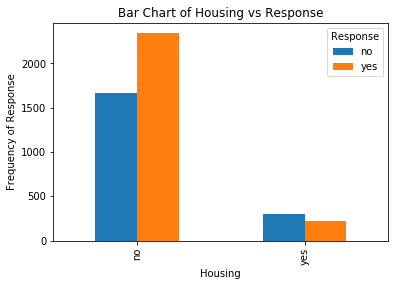

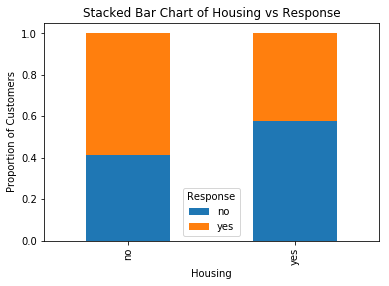

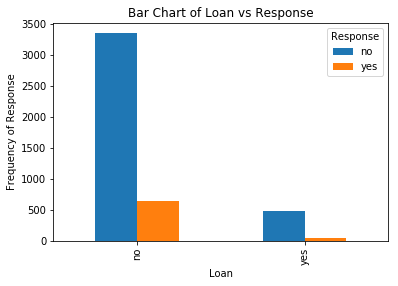

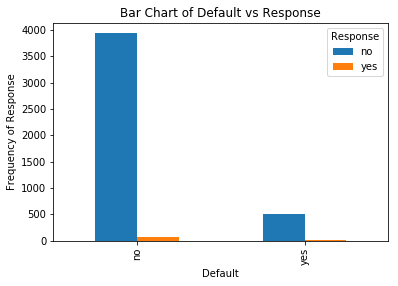

In [8]:
#visualize the crosstabs using bar charts

#bar chart Housing vs Response
a=pd.crosstab(bank1.response, bank1.housing)
a.plot(kind='bar')
plt.title('Bar Chart of Housing vs Response')
plt.xlabel('Housing')
plt.ylabel('Frequency of Response')
plt.legend(title='Response')

#stacked bar chart Housing vs Response
a.div(a.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Housing vs Response')
plt.xlabel('Housing')
plt.ylabel('Proportion of Customers')
plt.legend(title='Response')

#bar chart Loan vs Response
b=pd.crosstab(bank1.response, bank1.loan)
b.plot(kind='bar')
plt.title('Bar Chart of Loan vs Response')
plt.xlabel('Loan')
plt.ylabel('Frequency of Response')
plt.legend(title='Response')

#bar chart Default vs Response
c=pd.crosstab(bank1.response, bank1.default)
c.plot(kind='bar')
plt.title('Bar Chart of Default vs Response')
plt.xlabel('Default')
plt.ylabel('Frequency of Response')
plt.legend(title='Response')

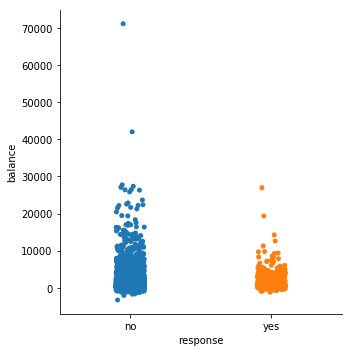

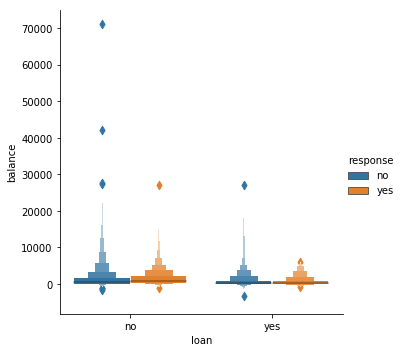

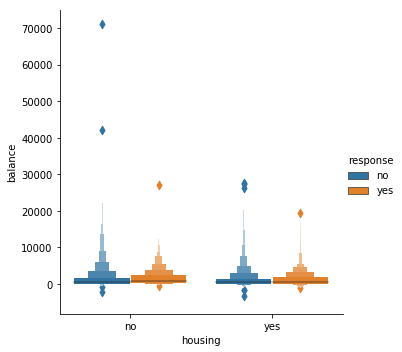

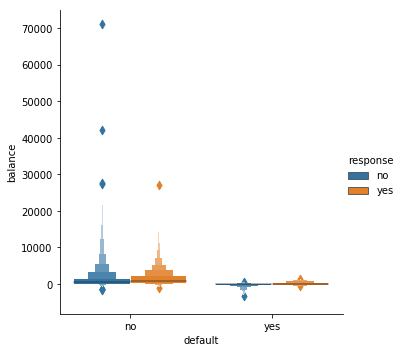

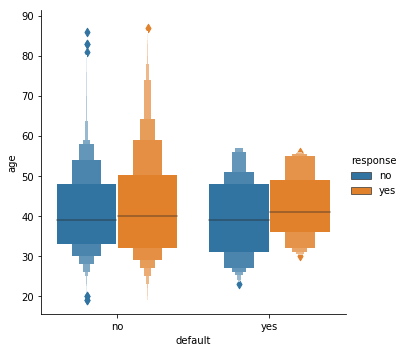

In [9]:
fig4=sns.catplot(x="response", y="balance", data=bank1)  #Response vs Balance
fig5=sns.catplot(x="loan", y="balance", hue="response", kind="boxen", data=bank1)  #Loan vs Balance
fig6=sns.catplot(x="housing", y="balance", hue="response", kind="boxen", data=bank1) #Housing vs Balance
fig7=sns.catplot(x="default", y="balance", hue="response", kind="boxen", data=bank1) #Default vs Balance
fig8=sns.catplot(x="default", y="age", hue="response", kind="boxen", data=bank1)    #Default vs Age

In [11]:
a=pd.crosstab(bank.response_yes, bank.housing_yes, 
            rownames=['Response'], colnames=['Housing'])

b=pd.crosstab(bank.response_yes, bank.loan_yes, 
            rownames=['Response'], colnames=['Loan'])

c=pd.crosstab(bank.response_yes, bank.default_yes, 
            rownames=['Response'], colnames=['Default'])

####################### Calculate Odds Ratio using the defined function ###########################
def myor(a):
        myv=round((a.loc[1,1]/a.loc[0,1])/(a.loc[1,0]/a.loc[0,0]),3) #Odds Ratio = (p1/(1-p1))/(p12/(1-p2))
        logmyv=np.log(myv)  #get the log values
        se=np.sqrt(1/(a.loc[1,1]+1/a.loc[0,1]+a.loc[1,0]+a.loc[0,0])) #standard error
        lower=round(np.exp(logmyv-1.96*se),3)    #lower CI
        upper=round(np.exp(logmyv+1.96*se),3)   #upper CI
        return [myv, lower, upper]
  
print('\033[1m',"Odds for Response Yes for Each Variable with 95% CI", '\033[0m')
print("If housing=yes, odds for response=yes:", myor(a))
print("If loan=yes, odds for response=yes:", myor(b))
print("If default=yes, odds for response=yes", myor(c))

 Odds for Response Yes for Each Variable with 95% CI 
If housing=yes, odds for response=yes: [0.519, 0.498, 0.541]
If loan=yes, odds for response=yes: [0.465, 0.451, 0.48]
If default=yes, odds for response=yes [1.032, 1.002, 1.063]


In [12]:
####################### Build Train and Test data ###########################
X,y=np.array(bank[['loan_yes', 'default_yes', 'housing_yes']]),np.array(bank['response_yes'])  #specify X's and y
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.3, random_state=42)   #split into train and test data (70% vs 30%)
print("% defaults:", round(100*sum(y) / len(y),2))

% defaults: 11.52


In [14]:
#check if the training data set has balanced distribution of the response variable
minority, majority = X_train[y_train==1], X_train[y_train==0] #bifurcate
print("\nTraining data has", len(minority), "rows with reponse=1 and", len(majority), "rows with response=0." )
print("\nThere is upsampling issue.")
oversample=len(majority)


Training data has 369 rows with reponse=1 and 2795 rows with response=0.

There is upsampling issue.


In [15]:
######### Resample with Replacement ##############################
minority= resample(minority, replace=True, n_samples=oversample, random_state=123) 
len(minority)

######### Rebuild the training set with the upsampled data ########
X_train1 = np.concatenate((minority, majority))
a,b = np.repeat(1,oversample),np.repeat(0,len(majority)) 
y_train1 = np.append(a, b)
print(sum(y_train1)/len(y_train1))  #Now we have 50/50 samples with response 1 and 0

0.5


In [16]:
# take a look of X variables and y variable
X_train1
y_train1

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
X_train1

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [18]:
###Import libraries for logistic regression and naive bayes
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn import metrics

nfolds=10   #set up number of folds for k-fold cross validation

In [20]:
#run logistic regression
logreg = LogisticRegression(solver="lbfgs", multi_class="ovr", C=1e9) #logistic regression model
logreg.fit(X_train1, y_train1)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [21]:
print(logreg.coef_)   #print out the coefficients for the explanatory variables (Loan, Default, Housing)

[[-0.50588148  0.24753877 -0.65653639]]


In [22]:
mycvs = cross_val_score(logreg,X_train1,y_train1,cv=nfolds)
print("Accuracy of LR: \n", mycvs)   #print out the 10 accuracy scores

Accuracy of LR: 
 [0.57678571 0.58035714 0.59285714 0.58214286 0.61964286 0.60573477
 0.58960573 0.59677419 0.62903226 0.58781362]


In [23]:
#run naive bayes classifier
clf_nb = BernoulliNB()
clf_nb.fit(X_train1, y_train1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
mycvs_nb = cross_val_score(clf_nb, X_train1, y_train1, cv=nfolds)   
print("\n Accuracy of NB: \n", mycvs_nb)   #print out the 10 accuracy scores


 Accuracy of NB: 
 [0.57678571 0.58035714 0.59285714 0.58571429 0.61964286 0.60573477
 0.58960573 0.59677419 0.62903226 0.58781362]


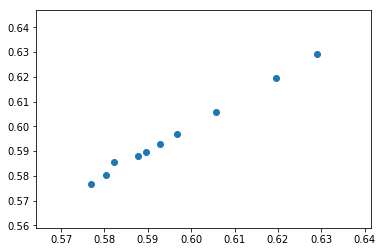

In [25]:
from matplotlib.pyplot import scatter
scatter(mycvs, mycvs_nb)

#The two models produce the same results as the training set size 
#approaches ∞ IF the Naive Bayes assumption holds that the Xi’s are 
#conditionally independent of one another given y. 

In [26]:
######### Fit Training data, Get Confusion Matrix, Calculate AUC/PPV/NPV ########
#fit logstic regression
logreg.fit(X_train1,y_train1)   #fit the model according to the given training data
mypred=logreg.predict_proba(X_train1)  #get probability estimates
mypred = [p[1] for p in mypred]
mypredclass=logreg.predict(X_train1)   #predict class labels for samples in X_train1.

#fit naive bayes
clf_nb.fit(X_train1,y_train1)
mypred1=clf_nb.predict_proba(X_train1)
mypred1=[p[1] for p in mypred1]
mypredclass1=clf_nb.predict(X_train1)

def metrics(y,mypred):
    print("Area Under the Curve:", roc(y,mypred))
    myconfusion = confusion_matrix(y,mypredclass)
    PPV=(myconfusion[1,1]/(myconfusion[1,0]+myconfusion[1,1]))
    NPV=(myconfusion[0,0]/(myconfusion[0,0]+myconfusion[0,1]))
    print("\n Confusion Matrix: \n",myconfusion)
    print("\n PPV, Correctly Classifies Response Yes: \n", PPV)
    print("\n NPV, Correctly Classifies Response No: \n", NPV)

In [27]:
metrics(y_train1,mypred)   #for logistic regression fit

Area Under the Curve: 0.5985032689987552

 Confusion Matrix: 
 [[1801  994]
 [1253 1542]]

 PPV, Correctly Classifies Response Yes: 
 0.5516994633273703

 NPV, Correctly Classifies Response No: 
 0.6443649373881932


In [28]:
metrics(y_train1,mypred1)  #for naive bayes fit

Area Under the Curve: 0.5985032689987552

 Confusion Matrix: 
 [[1801  994]
 [1253 1542]]

 PPV, Correctly Classifies Response Yes: 
 0.5516994633273703

 NPV, Correctly Classifies Response No: 
 0.6443649373881932


In [29]:
######### Fit Test data, Get Confusion Matrix, Calculate AUC/PPV/NPV ########
mypred=logreg.predict_proba(X_test)
mypred = [p[1] for p in mypred]
mypredclass=logreg.predict(X_test)

mypred1=clf_nb.predict_proba(X_test)
mypred1=[p[1] for p in mypred1]
mypredclass1=clf_nb.predict(X_test)

In [30]:
metrics(y_test, mypred)   #for logistic regression fit

Area Under the Curve: 0.5959407075780739

 Confusion Matrix: 
 [[793 412]
 [ 72  80]]

 PPV, Correctly Classifies Response Yes: 
 0.5263157894736842

 NPV, Correctly Classifies Response No: 
 0.6580912863070539


In [31]:
metrics(y_test,mypred1)  #for naive bayes fit

Area Under the Curve: 0.5959407075780739

 Confusion Matrix: 
 [[793 412]
 [ 72  80]]

 PPV, Correctly Classifies Response Yes: 
 0.5263157894736842

 NPV, Correctly Classifies Response No: 
 0.6580912863070539


In [32]:
######### Plot ROC Curve to show the classificaiton performance ########
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(mypredclass, y_test)
roc_auc = auc(fpr, tpr)

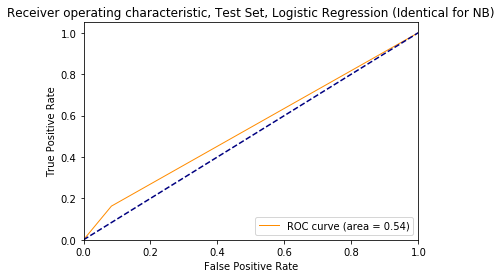

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, Test Set, Logistic Regression (Identical for NB)')
plt.legend(loc="lower right")
plt.show()

In [34]:
#Returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(clf_nb.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64
Accuracy of naive bayes classifier on test set: 0.64
